<a href="https://colab.research.google.com/github/blotaey/Projects-ML-2020-/blob/main/Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

uri = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri)

filmes.columns = ['filme_id', 'título', 'genero']
filmes.head()

,filme_id,título,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
generos = filmes.genero.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,título,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print('Grupos', modelo.labels_)

Grupos [2 2 1 ... 1 2 1]


In [ ]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-5.91799474e-02  3.96068766e-01 -2.52832055e-01 -2.25146863e-01
  -2.57547238e-01 -2.27542305e-01  2.55545141e+00 -1.97914585e-01
   1.78855063e-01 -2.40856319e-01  6.48274368e-01 -1.71734600e-01
  -7.04697394e-02 -1.52674295e-01  3.85816584e-01 -2.53724386e-01
  -2.53348066e-01  7.35185422e-01 -1.60133280e-01 -6.31671060e-02]
 [ 2.46791141e-02 -2.85388650e-01 -3.07573058e-01 -2.05285992e-01
  -1.93111771e-01  8.37849225e-02 -3.74631584e-01  8.57940831e-02
   9.78207623e-02 -1.77367696e-01 -9.49256298e-02  5.89613461e-02
  -1.13427250e-01 -6.16020218e-03 -4.65947618e-02  1.10310188e-01
  -1.68086142e-01 -1.17837185e-01  4.15308691e-02  1.13705308e-02]
 [-5.91799474e-02  9.00966637e-01  1.48170324e+00  1.031320

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)

grupos 

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.396069,-0.252832,-0.225147,-0.257547,-0.227542,2.555451,-0.197915,0.178855,-0.240856,0.648274,-0.171735,-0.070470,-0.152674,0.385817,-0.253724,-0.253348,0.735185,-0.160133,-0.063167
1,0.024679,-0.285389,-0.307573,-0.205286,-0.193112,0.083785,-0.374632,0.085794,0.097821,-0.177368,-0.094926,0.058961,-0.113427,-0.006160,-0.046595,0.110310,-0.168086,-0.117837,0.041531,0.011371
2,-0.059180,0.900967,1.481703,1.031321,1.004537,-0.180907,-0.346740,-0.211606,-0.545210,0.925874,-0.088432,-0.118586,0.529316,0.140587,-0.094206,-0.272634,0.896280,-0.057512,-0.054099,-0.000291


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6e4706780>,
      dtype=object)

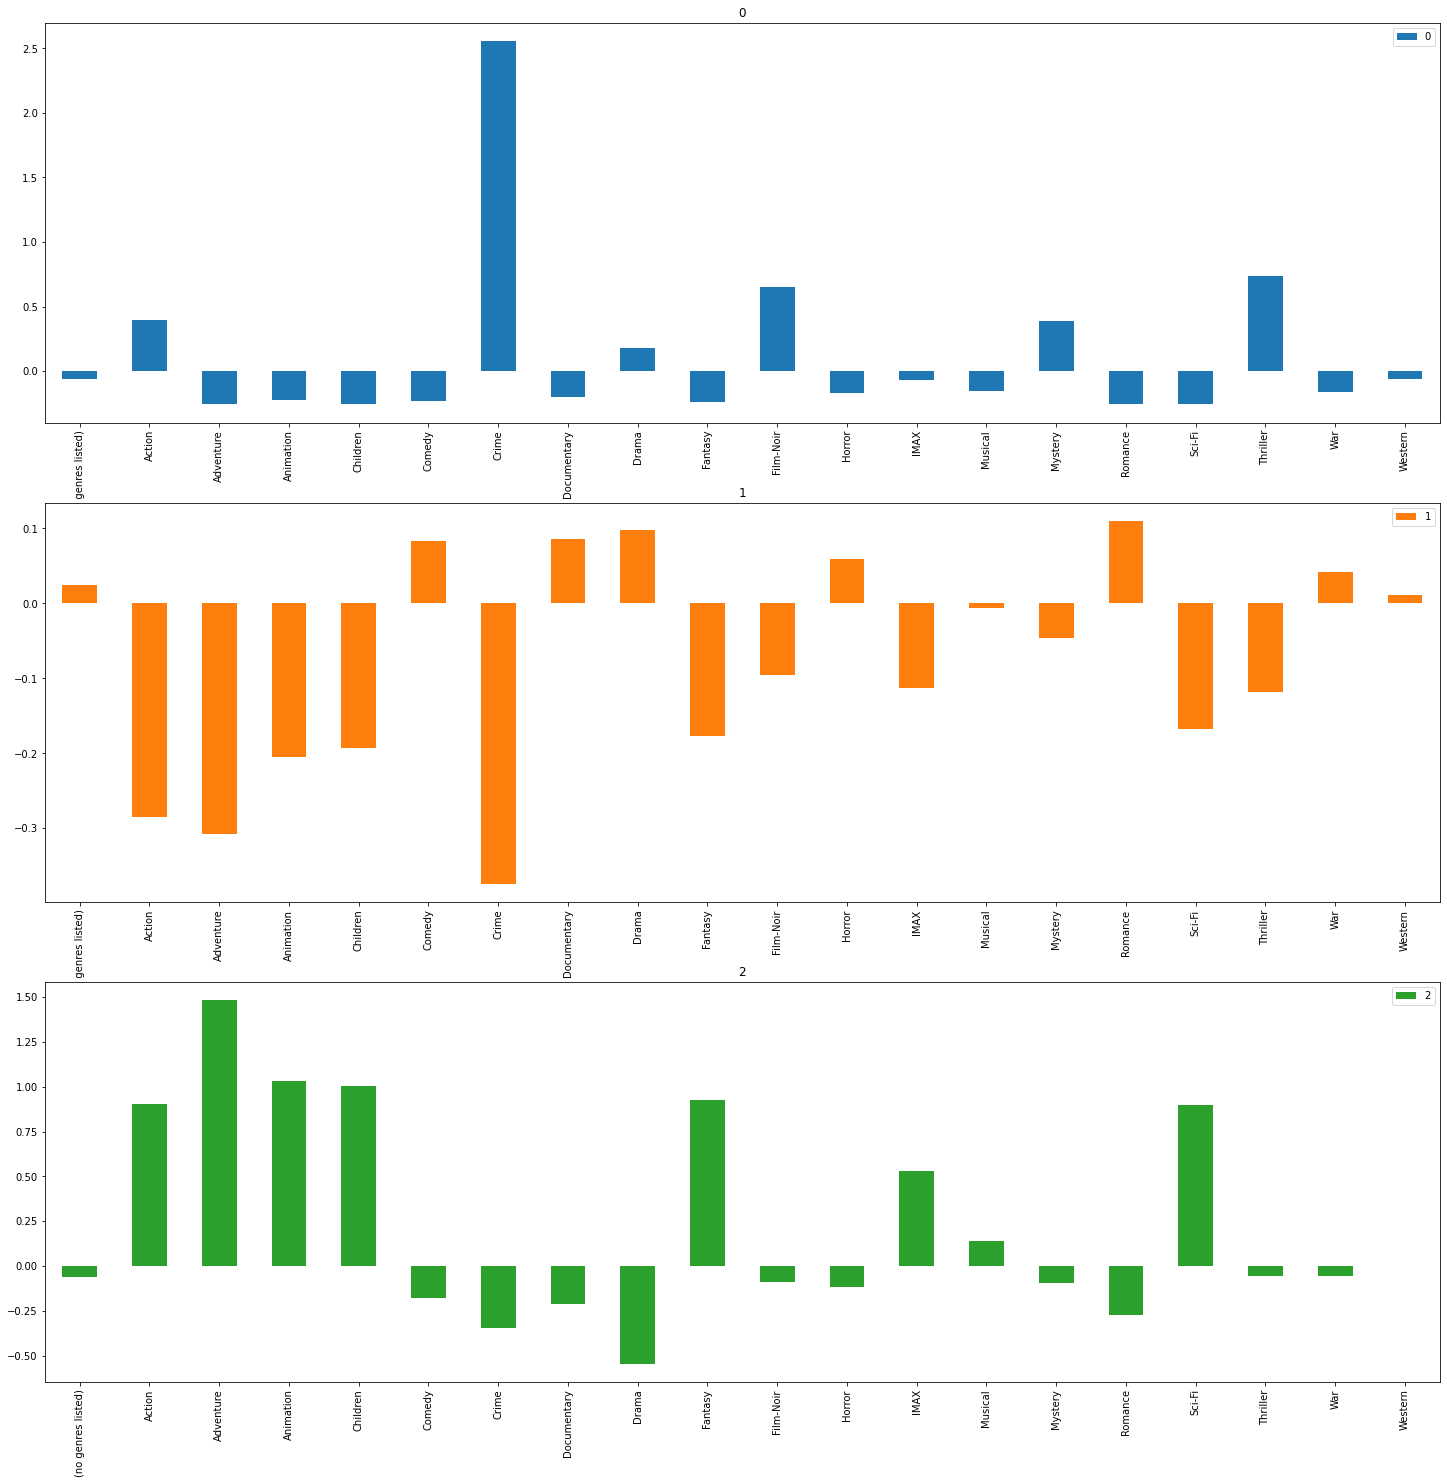

In [ ]:
grupos.transpose().plot.bar(subplots=True,
                figsize = (25, 25),
                sharex=False)


In [ ]:
grupo = 2

filtro = modelo.labels_ == grupo 

dados_dos_filmes[filtro].sample(10)

,filme_id,título,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7369,79057,Predators (2010),Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2970,3981,Red Planet (2000),Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6797,60684,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0
349,393,Street Fighter (1994),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8691,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4348,6350,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,Action|Adventure|Animation|Children|Fantasy|Sc...,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1544,2080,Lady and the Tramp (1955),Animation|Children|Comedy|Romance,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2529,3389,Let's Get Harry (1986),Action|Adventure,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4351,6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7608,86880,Pirates of the Caribbean: On Stranger Tides (2...,Action|Adventure|Fantasy|IMAX,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.manifold import TSNE


In [ ]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 22.269407 , -65.30872  ],
       [ 26.018139 ,  41.802925 ],
       [  1.2345049, -50.45354  ],
       ...,
       [ 18.83602  ,  -3.9295413],
       [ 33.116894 ,  20.075077 ],
       [-19.840303 ,   1.3719487]], dtype=float32)

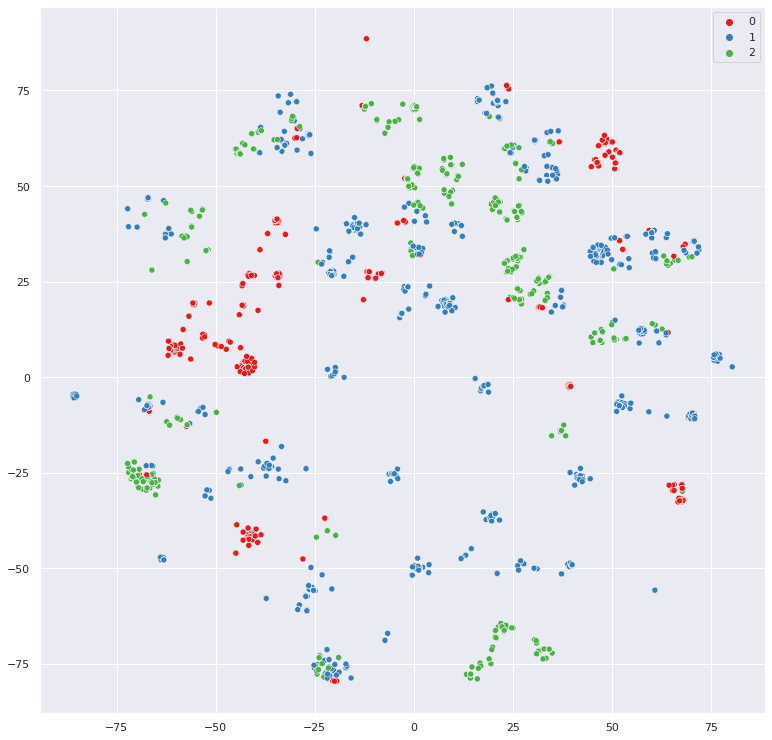

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})


sns.scatterplot(x= visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette = sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d8c020b8>,
      dtype=object)

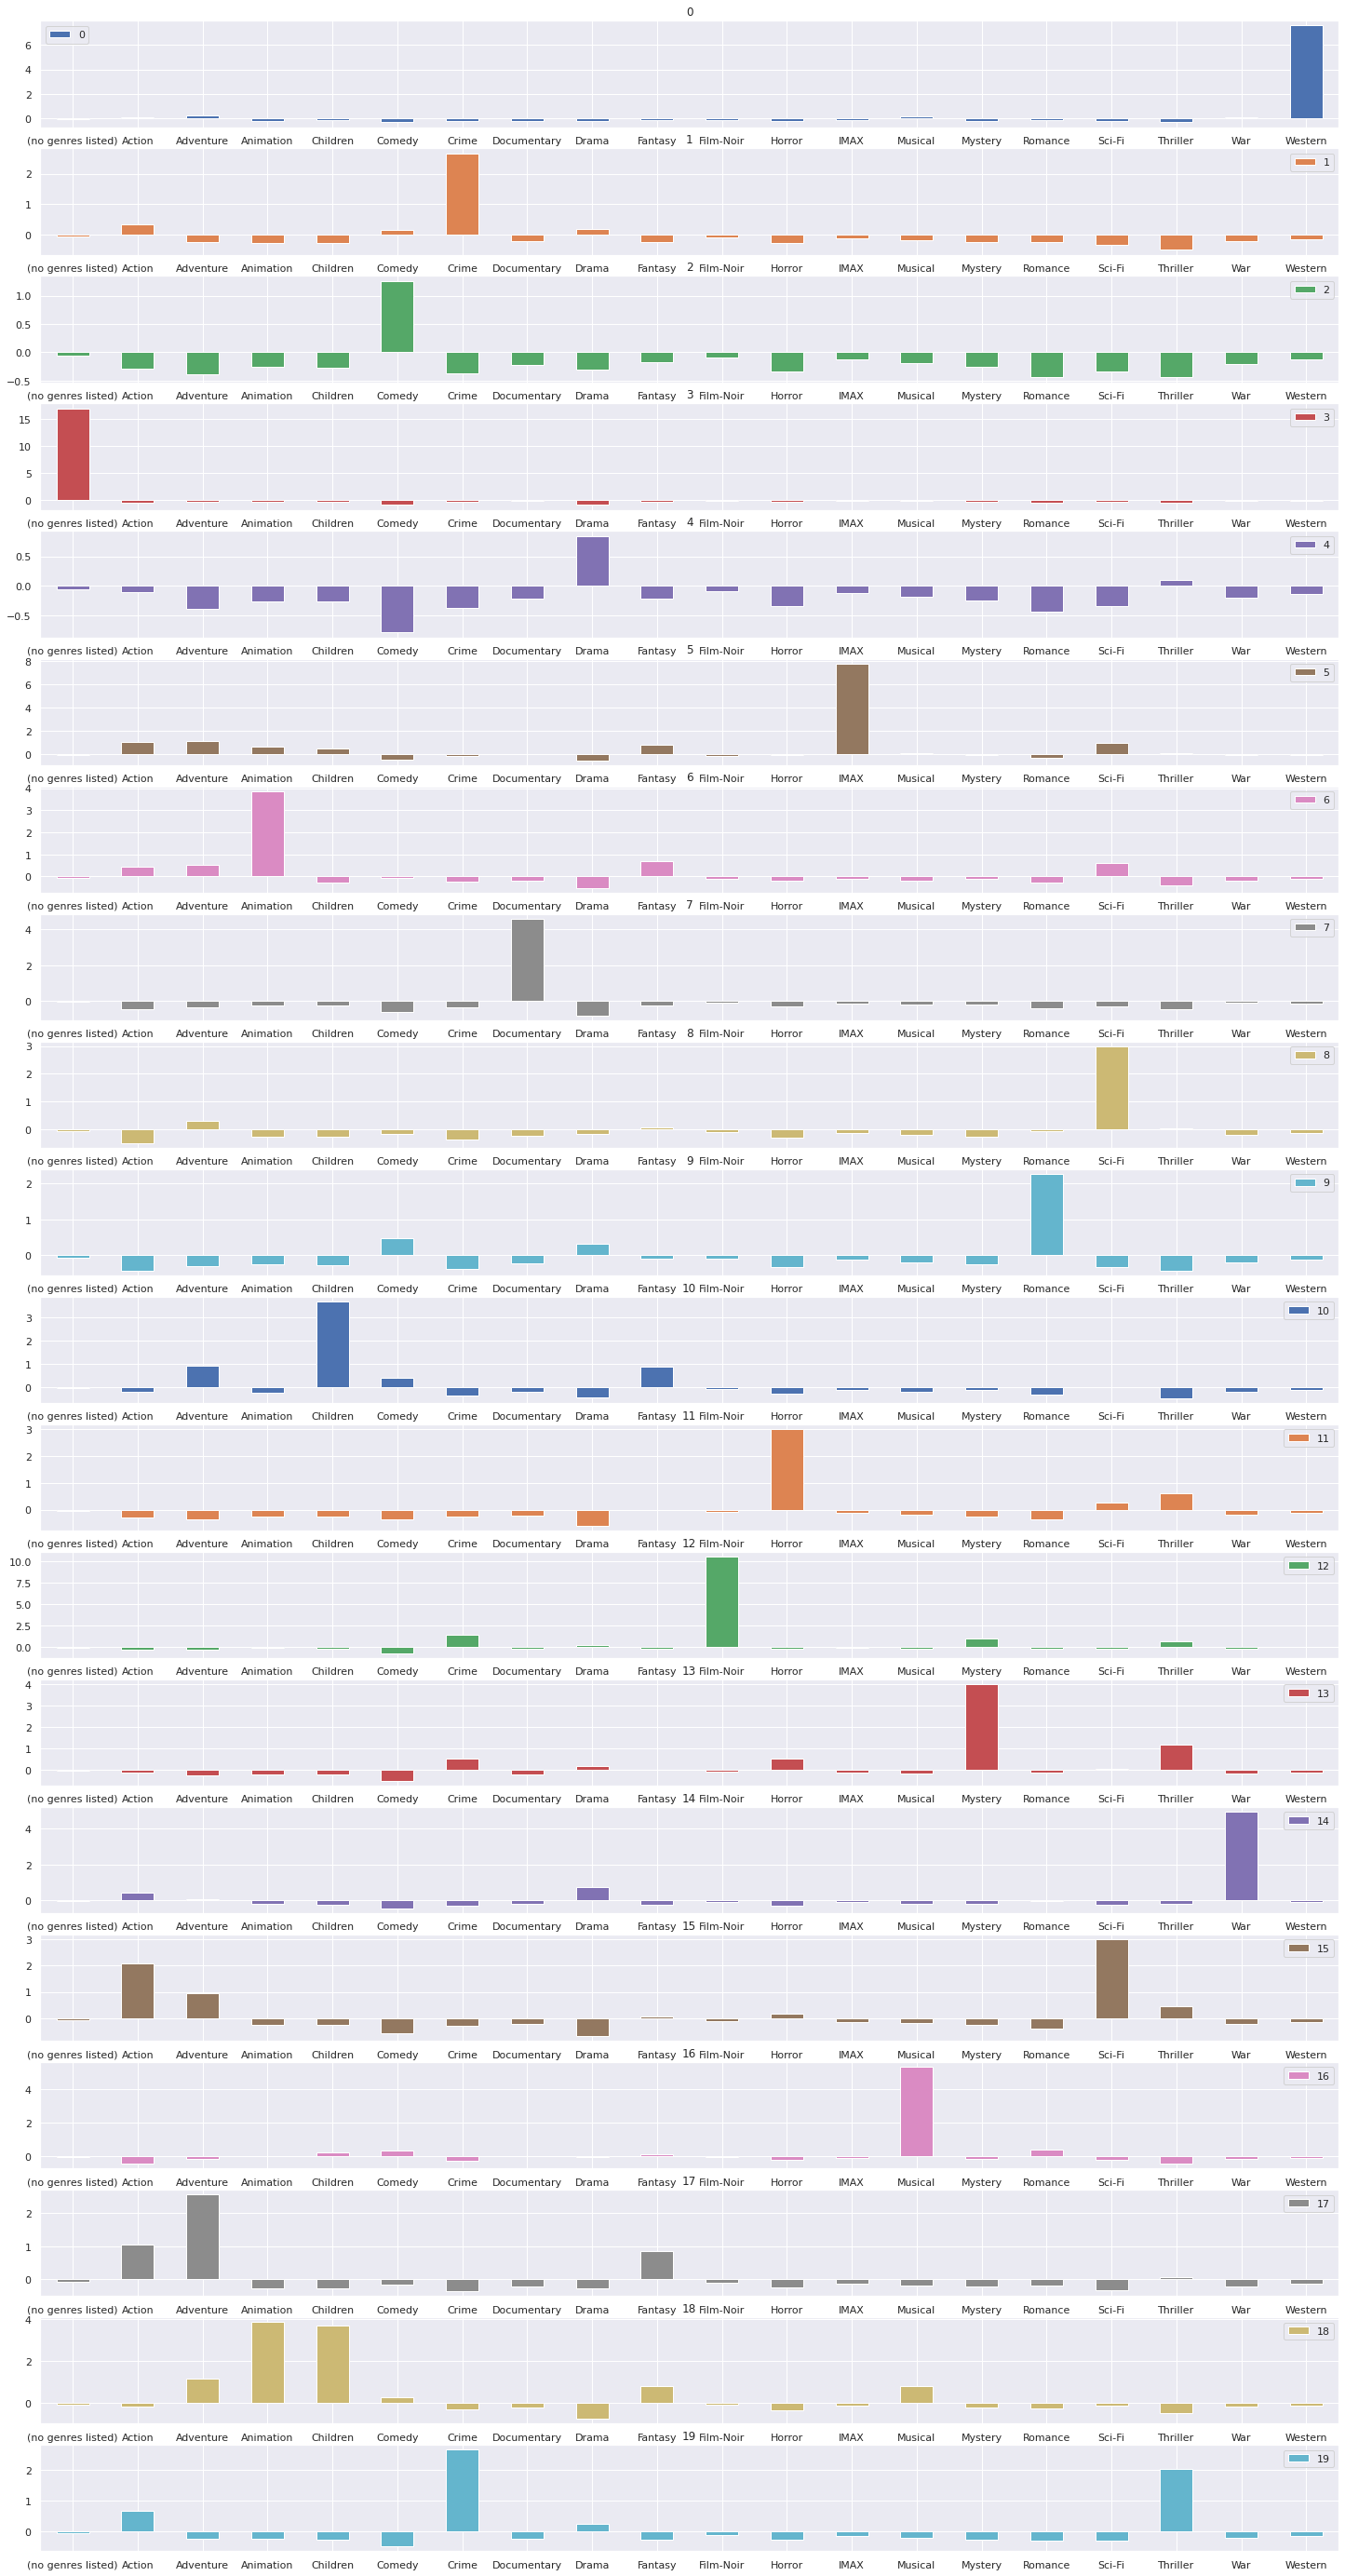

In [ ]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [ ]:

grupo = 8

filtro = modelo.labels_ == grupo 

dados_dos_filmes[filtro].sample(10)


,filme_id,título,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3342,4526,My Stepmother Is an Alien (1988),Comedy|Romance|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
5024,7812,Babylon 5: Thirdspace (1998),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8476,112868,"Signal, The (2014)",Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
7821,92694,Perfect Sense (2011),Drama|Romance|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
999,1301,Forbidden Planet (1956),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3473,4738,Happy Accidents (2000),Romance|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2267,3008,Last Night (1998),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3078,4131,Making Mr. Right (1987),Comedy|Romance|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2233,2968,Time Bandits (1981),Adventure|Comedy|Fantasy|Sci-Fi,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return[numero_de_clusters, modelo.inertia_]


In [ ]:
kmeans(20, generos_escalados)

[20, 55002.09059353028]

In [ ]:
resultado = [kmeans(numero_de_grupos, generos_escalados)for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 166145.70377981302],
 [4, 155536.80165567674],
 [5, 147241.76713466313],
 [6, 137640.53141353416],
 [7, 128358.94194949212],
 [8, 120056.6786599704],
 [9, 109307.55427494748],
 [10, 102054.29541976076],
 [11, 93088.33089744175],
 [12, 88423.04970091907],
 [13, 80502.79321338871],
 [14, 74835.51730207336],
 [15, 69274.45874439618],
 [16, 63775.92350128465],
 [17, 61764.064406974576],
 [18, 58435.22689069446],
 [19, 57586.88837147191],
 [20, 55625.13877741658],
 [21, 52627.30557184628],
 [22, 51931.263843151566],
 [23, 50897.677548346044],
 [24, 49313.9275280875],
 [25, 47267.77020962045],
 [26, 46817.13898244091],
 [27, 46461.036952743336],
 [28, 45135.352980192736],
 [29, 43849.0071136265],
 [30, 42502.01680072681],
 [31, 41590.940272232554],
 [32, 40710.04937585635],
 [33, 40013.840898923954],
 [34, 39419.193380493336],
 [35, 39648.53834131186],
 [36, 37978.93371681132],
 [37, 36815.510559119364],
 [38, 36474.92454376279],
 [39, 35494.660

In [ ]:
resultado = pd.DataFrame(resultado,
             columns=['grupos', 'inertia'])

**ELBOW METHOD**


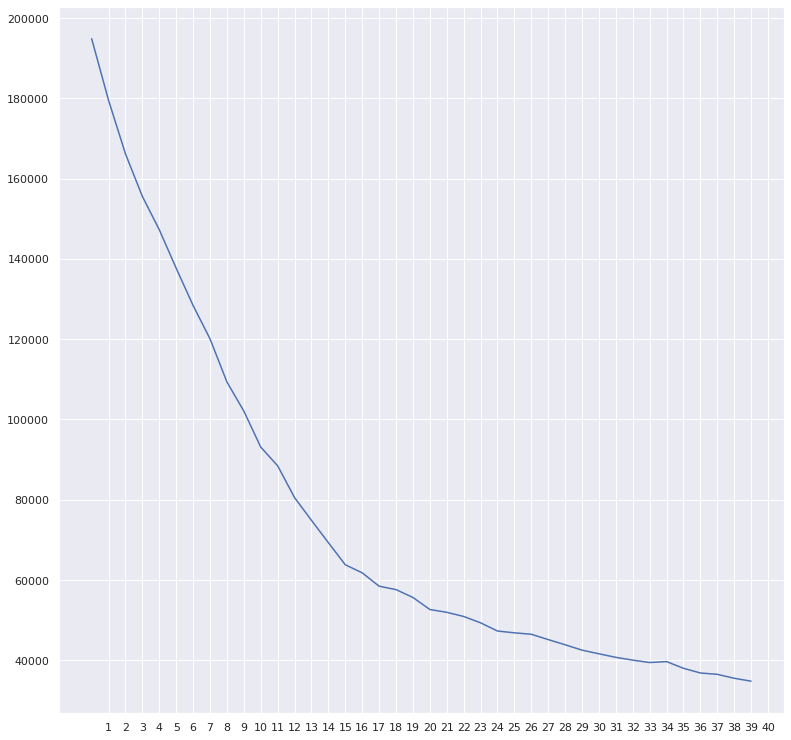

In [ ]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d7dc3a90>,
      dtype=object)

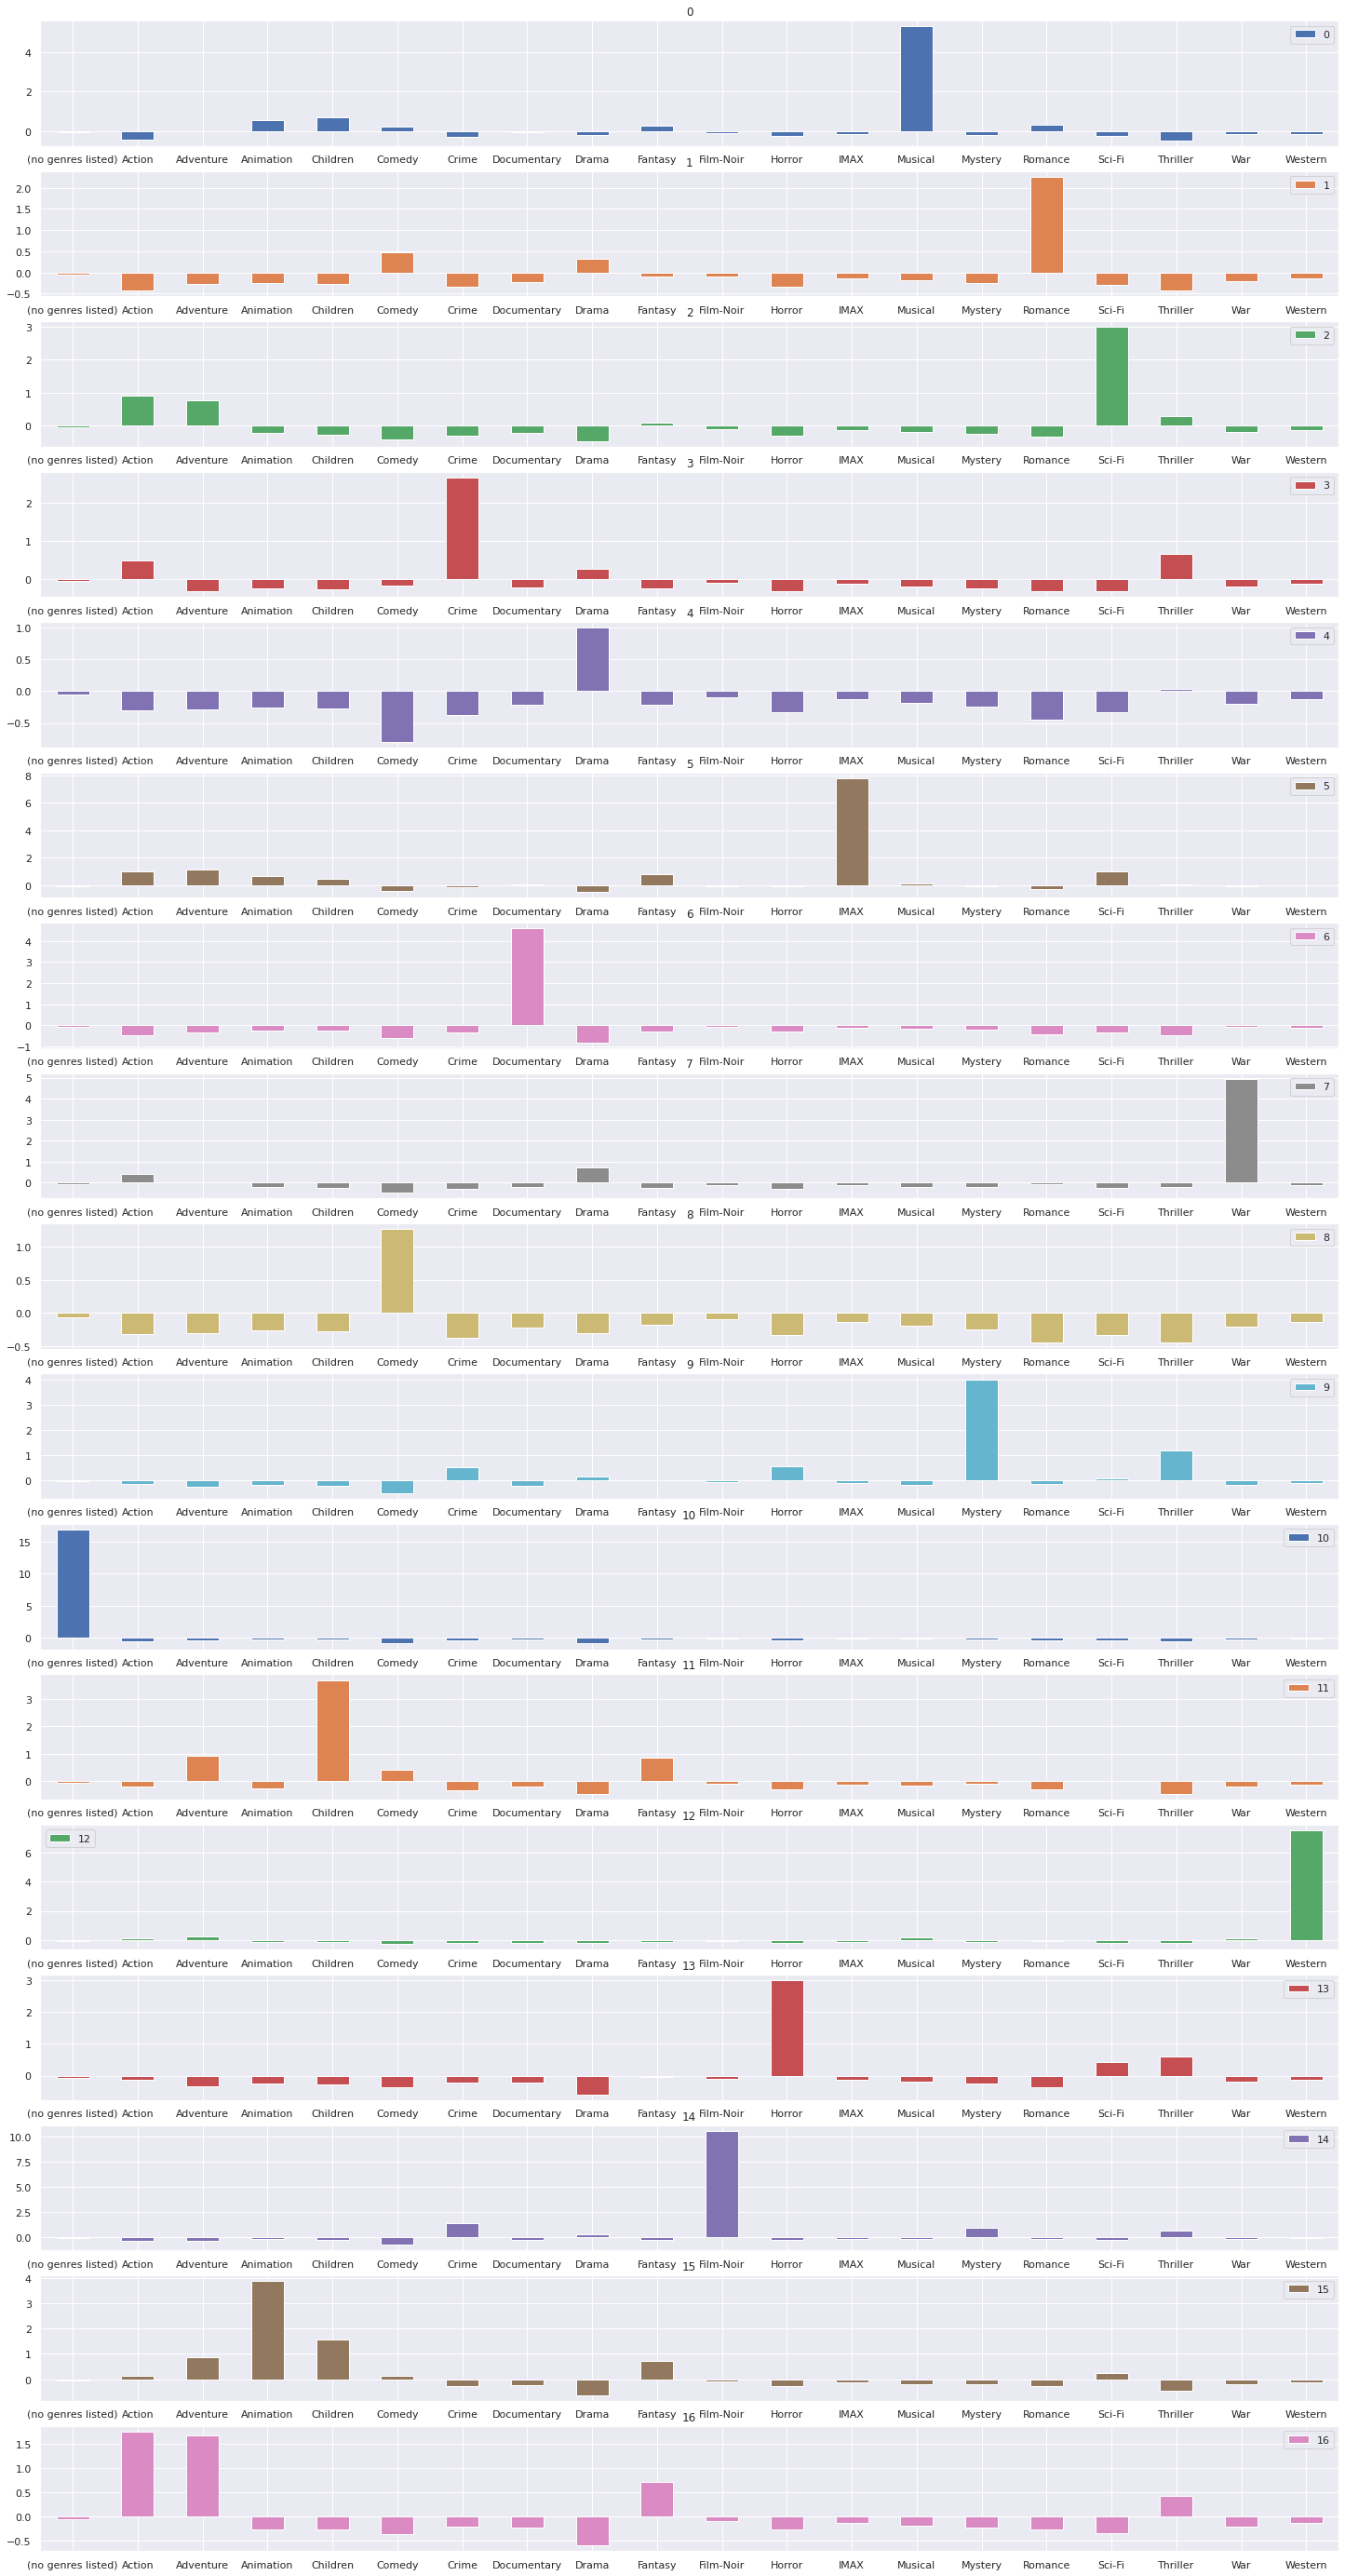

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [ ]:

grupo = 8

filtro = modelo.labels_ == grupo 

dados_dos_filmes[filtro].sample(10)



,filme_id,título,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8755,128099,Jim Jefferies: BARE (2014),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2322,3076,Irma la Douce (1963),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,178,Love & Human Remains (1993),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2647,3544,Shakes the Clown (1992),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6740,59258,Baby Mama (2008),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3418,4649,Wet Hot American Summer (2001),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1761,2359,Waking Ned Devine (a.k.a. Waking Ned) (1998),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1116,1456,"Pest, The (1997)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8825,131610,Willy/Milly (1986),Comedy|Fantasy,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2072,2751,From the Hip (1987),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Bottom Up (Agrupamento Hierarquico)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
modelo = AgglomerativeClustering(n_clusters=17)

grupos = modelo.fit_predict(generos_escalados)


In [ ]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

visualizacao

array([[-35.014683 ,   4.175358 ],
       [-30.674831 ,  25.452496 ],
       [ 26.085995 ,   4.5817666],
       ...,
       [ -4.3181334,  17.317976 ],
       [-48.774567 , -28.142235 ],
       [  5.9653497, -20.555933 ]], dtype=float32)

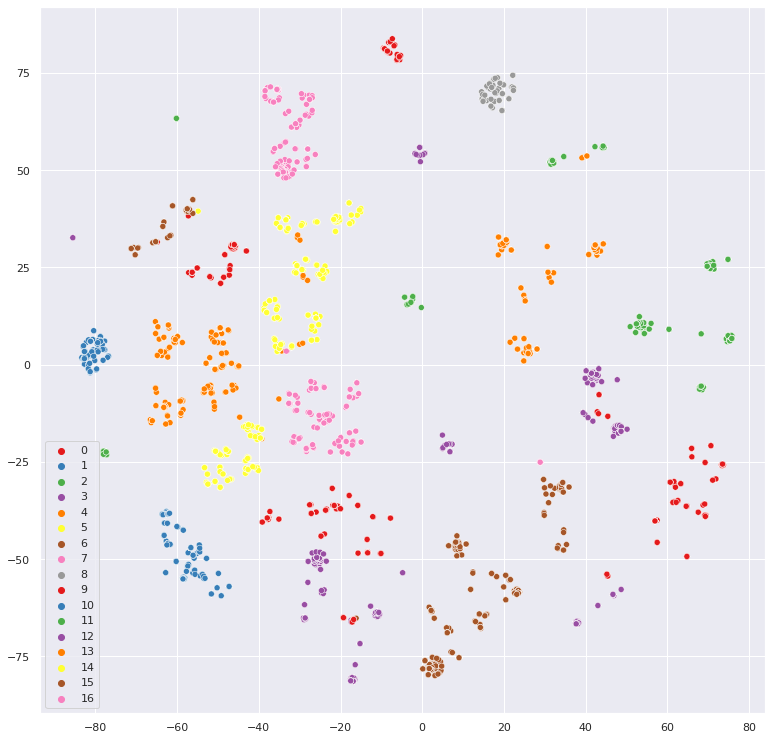

In [ ]:
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=grupos,
                palette = sns.color_palette('Set1', 17))

In [ ]:
#Agrupamento Hierarquico funciona atraves da matriz de distancia

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d8056c18>,
      dtype=object)

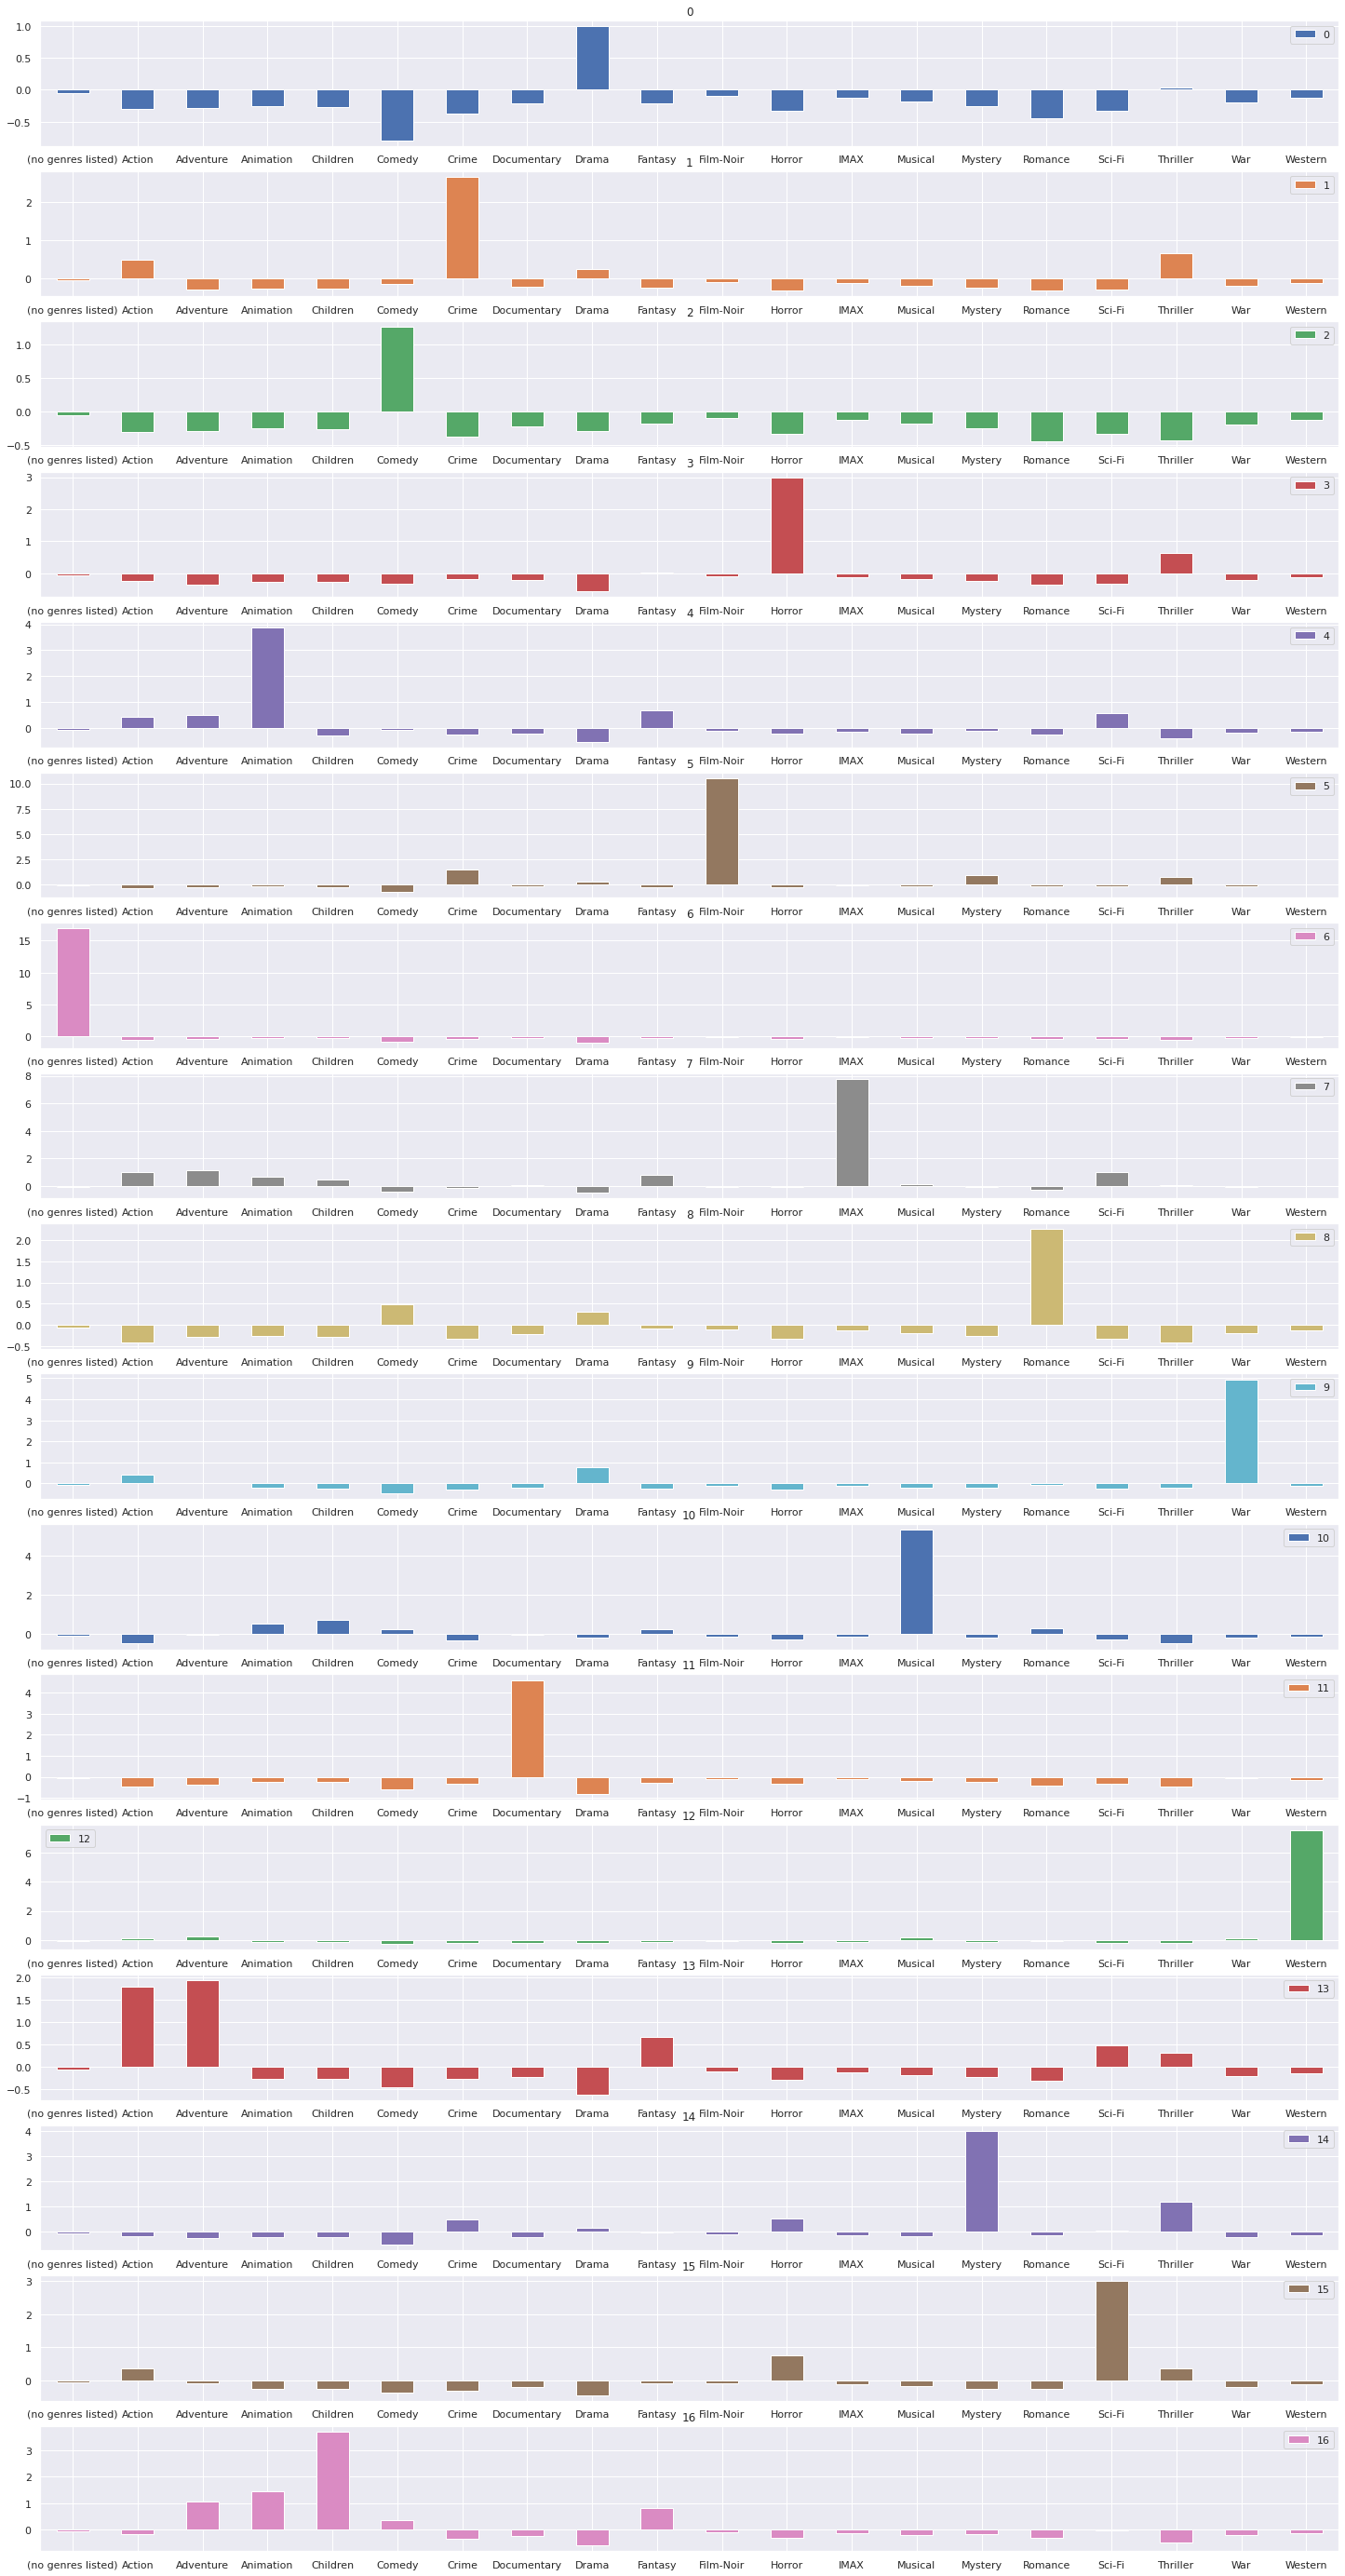

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [ ]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 0.        ,  2.        ,  2.47089999,  2.        ],
       [ 8.        , 17.        ,  2.88041384,  3.        ],
       [ 1.        , 18.        ,  3.3534073 ,  4.        ],
       [13.        , 19.        ,  3.68724746,  5.        ],
       [ 3.        , 20.        ,  3.76343998,  6.        ],
       [15.        , 21.        ,  3.76434993,  7.        ],
       [ 4.        , 22.        ,  4.64342804,  8.        ],
       [14.        , 23.        ,  4.68301034,  9.        ],
       [16.        , 24.        ,  4.74481985, 10.        ],
       [11.        , 25.        ,  5.17517528, 11.        ],
       [ 9.        , 26.        ,  5.24733235, 12.        ],
       [10.        , 27.        ,  5.81773336, 13.        ],
       [12.        , 28.        ,  7.87172656, 14.        ],
       [ 7.        , 29.        ,  8.11470188, 15.        ],
       [ 5.        , 30.        , 10.81333773, 16.        ],
       [ 6.        , 31.        , 17.0715877 , 17.        ]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.4708999870627855, 2.4708999870627855, 0.0],
  [0.0, 2.8804138364985947, 2.8804138364985947, 2.4708999870627855],
  [0.0, 3.3534072995454944, 3.3534072995454944, 2.8804138364985947],
  [0.0, 3.687247455241314, 3.687247455241314, 3.3534072995454944],
  [0.0, 3.763439979454177, 3.763439979454177, 3.687247455241314],
  [0.0, 3.7643499316180162, 3.7643499316180162, 3.763439979454177],
  [0.0, 4.643428043188142, 4.643428043188142, 3.7643499316180162],
  [0.0, 4.683010335510831, 4.683010335510831, 4.643428043188142],
  [0.0, 4.744819850041423, 4.744819850041423, 4.683010335510831],
  [0.0, 5.1751752825163075, 5.1751752825163075, 4.744819850041423],
  [0.0, 5.247332353429927, 5.247332353429927, 5.1751752825163075],
  [0.0, 5.817733361970347, 5.817733361970347, 5.247332353429927],
  [0.0, 7.871726563673254, 7.871726563673254, 5.817733361970347],
  [0

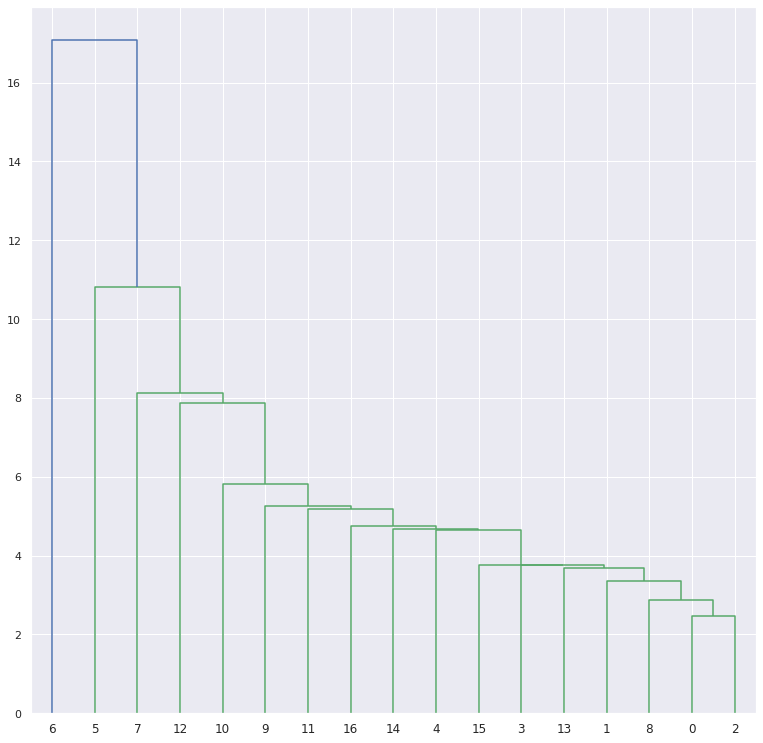

In [ ]:
dendrograma = dendrogram(matriz_de_distancia)
dendrograma